# Social Media Addiction, Mental Health, and Academic Performance
## A Statistical Association Analysis Among Students

### Introduction
The rapid growth of social media has transformed how students communicate, socialize, and engage with information. While smart use can provide social and informational benefits, excessive or problematic use has raised concerns regarding mental health and academic outcomes. Social media addiction, characterized by excessive engagement, has been increasingly linked to student well-being and reduced academic performance.

This study aims to examine the association between social media addiction and two key aspects of student well-being: Mental health and Perceived academic performance. Rather than making causal claims, this analysis focuses on identifying statistical associations using regression-based inference.

### Research Question
How is social media addiction associated with students’ mental health and perceived academic performance?

### Data Description
The dataset contains survey responses from students across multiple countries and academic levels. 

**Key Variables**
Main explanatory variable

- Addicted_Score: A composite score from 1 (low addiction) to 10 (high addiction), measuring the degree of problematic social media use.

Outcome variables

- Mental_Health_Score: Self-reported mental health score ranging from 1 (poor) to 10 (excellent).

- Affects_Academic_Performance: Binary indicator (“Yes”/“No”) of whether the student perceives social media as negatively affecting their academic performance.

**Control variables**

- Age
- Gender
- Academic_Level (High School, Undergraduate)

Controls are included to reduce confounding and isolate the association between addiction and outcomes.

### Methodology
This study employs regression-based statistical inference:

- **Ordinary Least Squares (OLS)** regression for mental health (continuous outcome)

- **Logistic** regression for academic performance (binary outcome)

All models include demographic and academic controls. Results are interpreted as associations, not causal effects.

### Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [3]:
df = pd.read_csv("Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [5]:
df.describe(include="all")

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


### Data Preprocessing

In [6]:
df["Affects_Academic_Performance"] = (df["Affects_Academic_Performance"] == "Yes").astype(int)

df = pd.get_dummies(df, columns=["Gender", "Academic_Level"], drop_first=True)

X = df[[
    "Addicted_Score",
    "Age",
    "Gender_Male",
    "Academic_Level_High School",
    "Academic_Level_Undergraduate"
]].astype(float)

X = add_constant(X)

y_mental = df["Mental_Health_Score"].astype(float)
y_academic = df["Affects_Academic_Performance"]

### Analysis: Addiction and Mental Health

In [7]:
model_mental = sm.OLS(y_mental, X).fit()
print(model_mental.summary())

                             OLS Regression Results                            
Dep. Variable:     Mental_Health_Score   R-squared:                       0.894
Model:                             OLS   Adj. R-squared:                  0.893
Method:                  Least Squares   F-statistic:                     1179.
Date:                 Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                         12:09:05   Log-Likelihood:                -279.22
No. Observations:                  705   AIC:                             570.4
Df Residuals:                      699   BIC:                             597.8
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

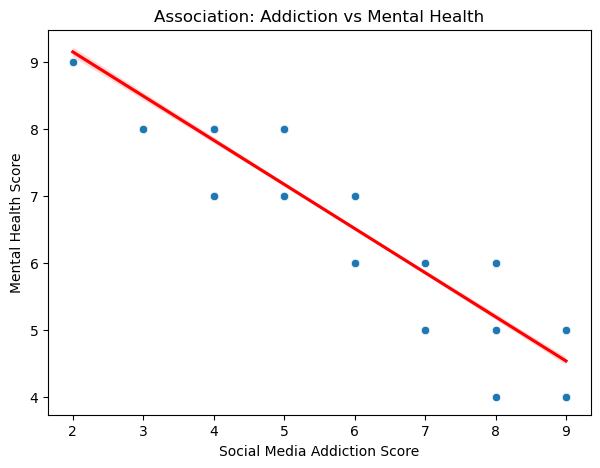

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Addicted_Score"], y=df["Mental_Health_Score"])
sns.regplot(x=df["Addicted_Score"], y=df["Mental_Health_Score"], scatter=False, color="red")
plt.xlabel("Social Media Addiction Score")
plt.ylabel("Mental Health Score")
plt.title("Association: Addiction vs Mental Health")
plt.show()

### Analysis: Addiction and Academic Performance

In [9]:
model_academic = sm.Logit(y_academic, X).fit()
print(model_academic.summary())

odds_ratios = np.exp(model_academic.params)
print("\nOdds Ratios:\n", odds_ratios)

         Current function value: 0.023734
         Iterations: 35
                                Logit Regression Results                                
Dep. Variable:     Affects_Academic_Performance   No. Observations:                  705
Model:                                    Logit   Df Residuals:                      699
Method:                                     MLE   Df Model:                            5
Date:                          Thu, 08 Jan 2026   Pseudo R-squ.:                  0.9636
Time:                                  12:09:37   Log-Likelihood:                -16.733
converged:                                False   LL-Null:                       -459.61
Covariance Type:                      nonrobust   LLR p-value:                3.208e-189
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                       

/Users/Asus/miniforge3/envs/cpsc330/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


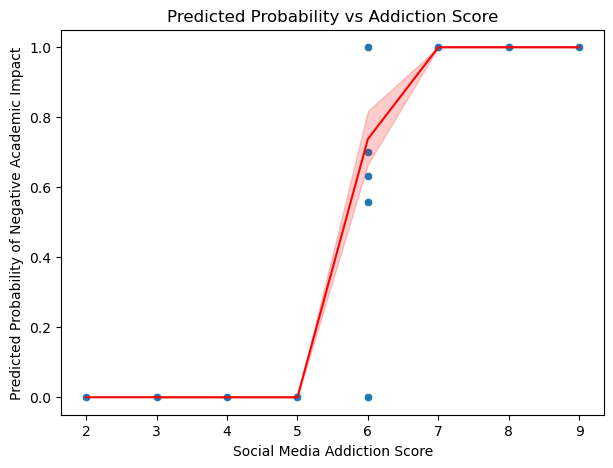

In [11]:
df["Predicted_Prob"] = model_academic.predict(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Addicted_Score"], y=df["Predicted_Prob"])
sns.lineplot(x=df["Addicted_Score"], y=df["Predicted_Prob"], color="red")
plt.xlabel("Social Media Addiction Score")
plt.ylabel("Predicted Probability of Negative Academic Impact")
plt.title("Predicted Probability vs Addiction Score")
plt.show()

### Results
Addicted_Score is strongly and negatively associated with mental health. Each one-point increase in addiction score corresponds to a statistically significant decrease in mental health, even after controlling for age, gender, and academic level. Age and undergraduate status are not significant predictors once addiction is accounted for, whereas high school students report significantly lower mental health compared to graduate students. Overall, the model explains a substantial proportion of variance in mental health, highlighting a robust association between addiction severity and psychological well-being.


Higher addiction scores are also associated with significantly higher odds of reporting negative academic impact. Each one-point increase in addiction score raises the likelihood of perceived academic impairment, controlling for demographic and academic characteristics. These results suggest that problematic social media use is closely linked to students’ self-assessed academic performance, indicating potential areas for intervention and support.

### Interpretation
Overall, the findings indicate that social media addiction is consistently associated with poorer student outcomes. Students with higher addiction scores tend to report worse mental health and are more likely to perceive social media as harming their academic performance. These associations persist after controlling for age, gender, and academic level, highlighting addiction severity as a key correlate of both psychological and academic challenges.

### Limitations
This analysis relies on self-reported, cross-sectional survey data, which limits causal inference and may be subject to reporting bias. Additionally, unobserved factors such as academic workload, personality traits, or offline social support were not captured and may influence the observed associations.

### Conclusion
This study provides strong statistical evidence that higher levels of social media addiction are associated with worse mental health and increased likelihood of perceived academic difficulties among students. While causality cannot be established, the findings underscore the importance of addressing problematic social media use as part of broader efforts to support student well-being and academic success.